In [10]:
import pandas as pd

In [11]:
surveys=pd.read_csv("data/surveys.csv")

In [12]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [13]:
surveys.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [14]:
type(surveys)

pandas.core.frame.DataFrame

In [17]:
species_count=surveys.groupby("species_id")["record_id"].count()
species_count

,record_id
species_id,
AB,303
AH,437
AS,2
BA,46
CB,50
CM,13
CQ,16
CS,1
CT,1


<Axes: xlabel='species_id'>

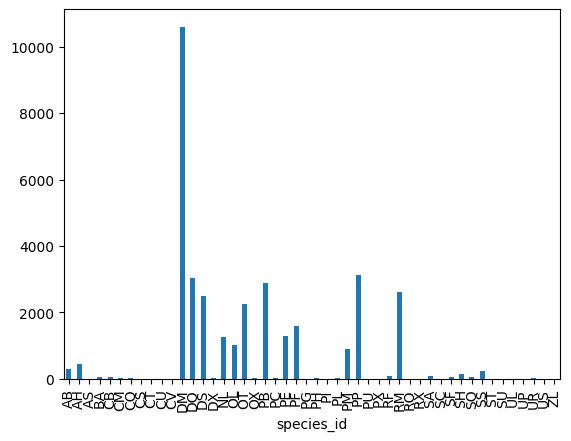

In [18]:
species_count.plot(kind="bar")

In [19]:
surveys_sex=surveys.groupby("sex")["record_id"].count()

<Axes: xlabel='sex'>

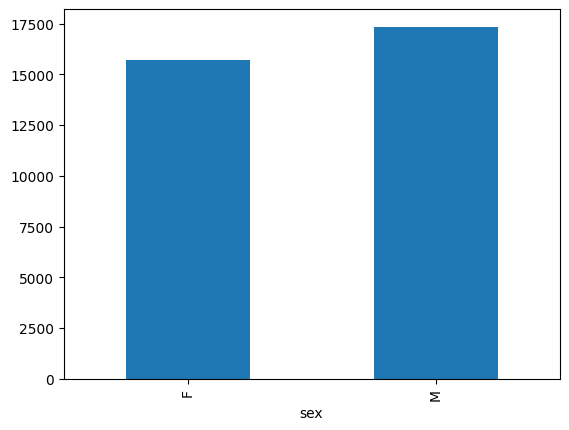

In [21]:
surveys_sex.plot(kind="bar")

In [22]:
import plotnine as p9

In [23]:
surveys_complete=pd.read_csv("/content/data/surveys.csv")

In [24]:
surveys_complete.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [25]:
surveys_complete=surveys_complete.dropna()

In [26]:
surveys_complete.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
67,68,8,19,1977,8,DO,F,32.0,52.0
68,69,8,19,1977,2,PF,M,15.0,8.0
69,70,8,19,1977,3,OX,F,21.0,22.0
70,71,8,19,1977,7,DM,F,36.0,35.0
73,74,8,19,1977,8,PF,M,12.0,7.0


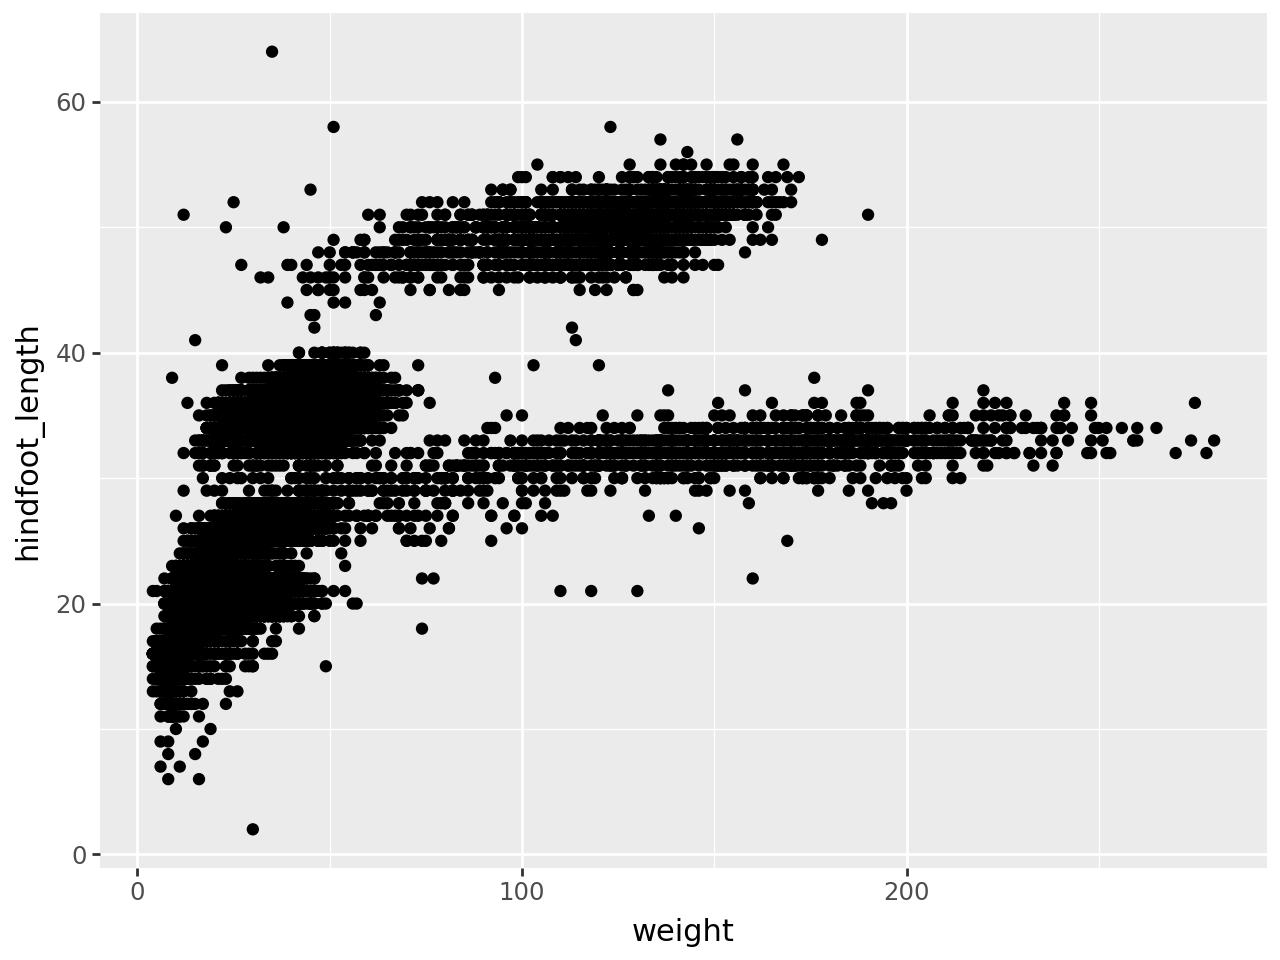

In [28]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x="weight", y="hindfoot_length")) +
  p9.geom_point()
  )

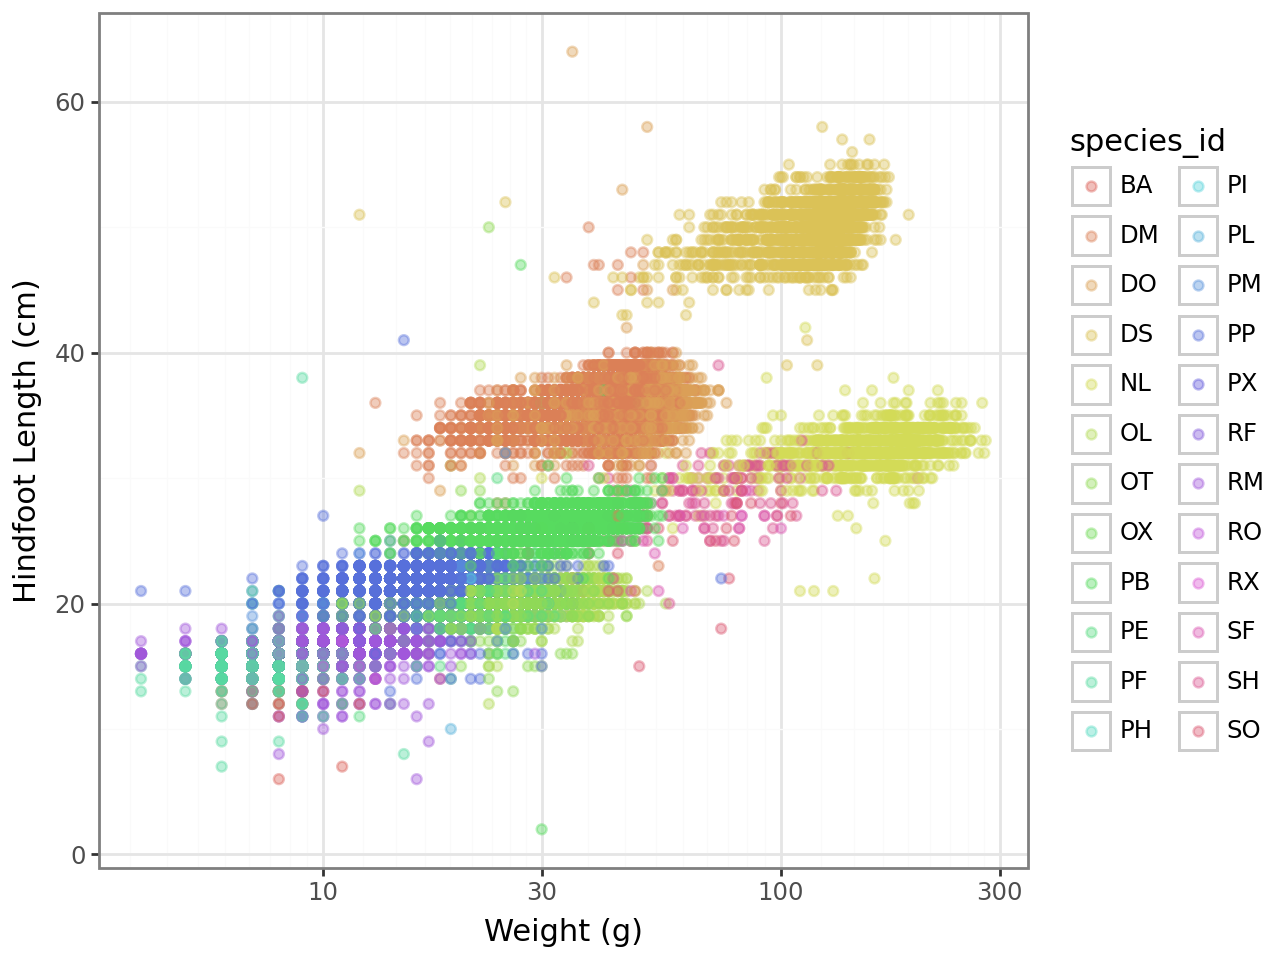

In [36]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x="weight", y="hindfoot_length", colour="species_id"))
+ p9.geom_point(alpha=0.4)
+ p9.xlab("Weight (g)")
+ p9.ylab("Hindfoot Length (cm)")
+ p9.scale_x_log10()
+ p9.theme_bw()
  )

In [37]:
surveys_complete.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0


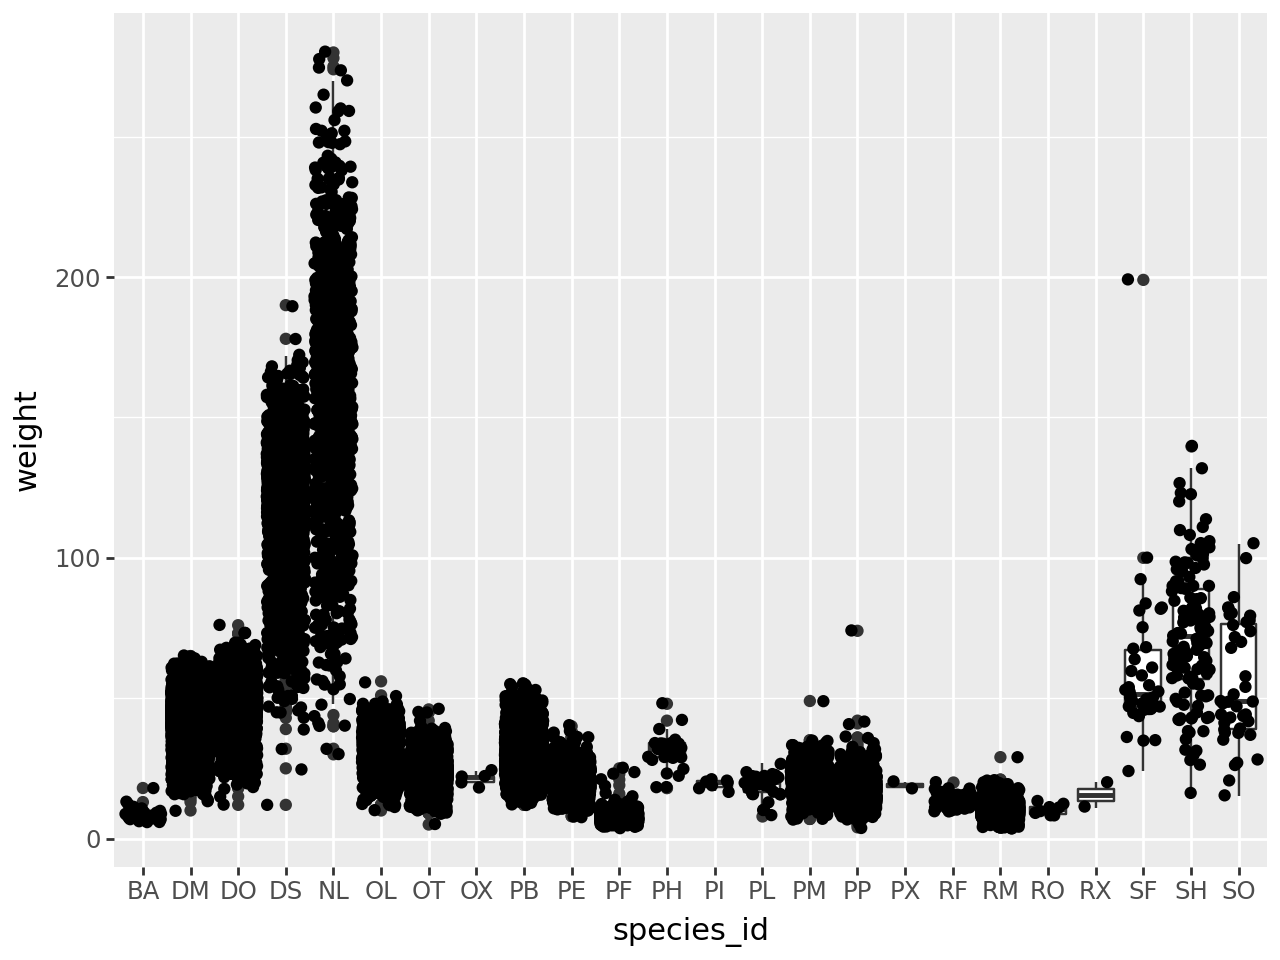

In [39]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x="species_id", y="weight"))
  + p9.geom_boxplot()
  + p9.geom_jitter()
  )

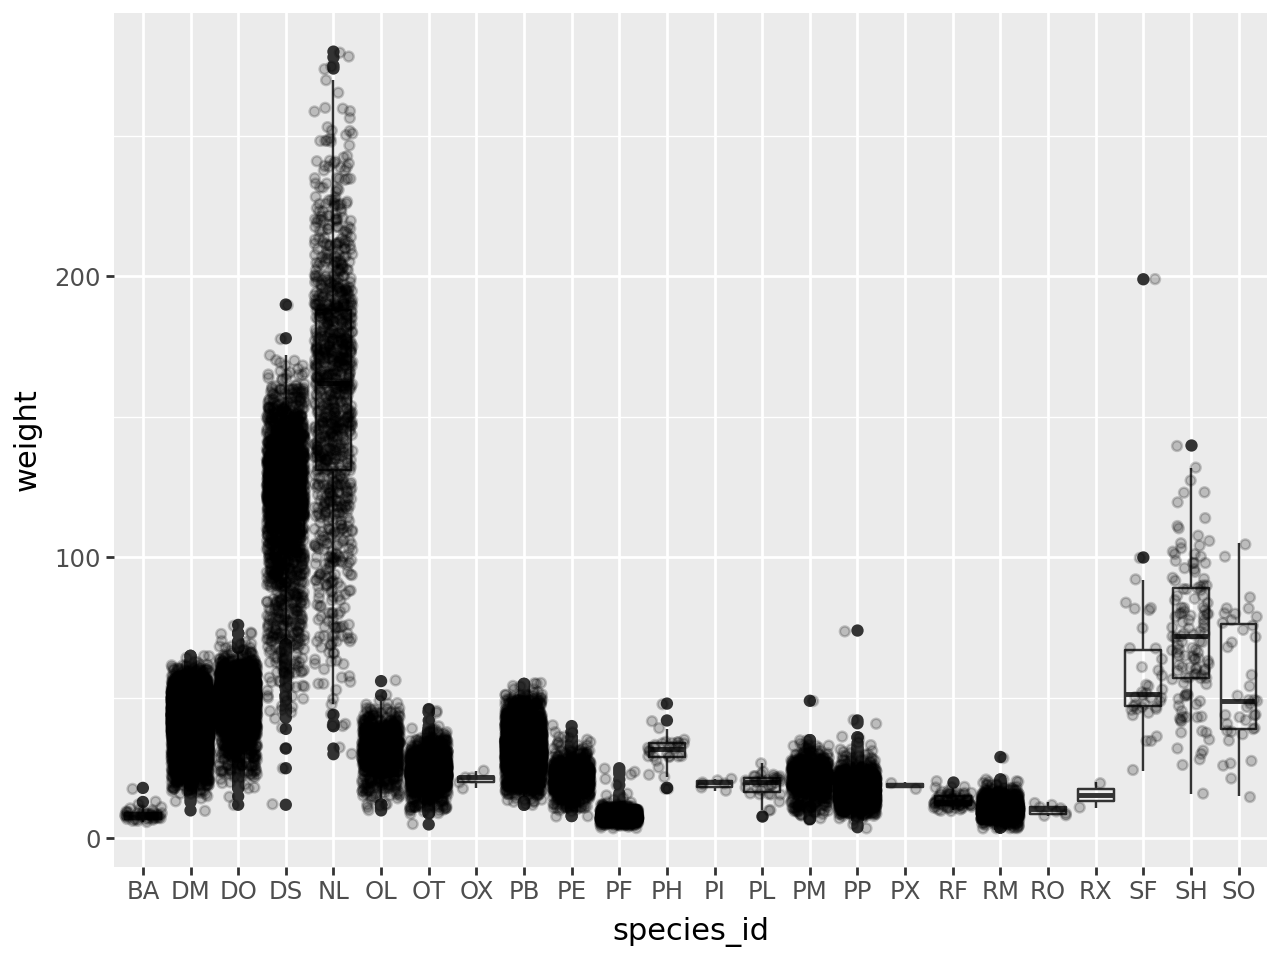

In [40]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x="species_id", y="weight"))
  + p9.geom_boxplot(alpha=0.2)
  + p9.geom_jitter(alpha=0.2)
  )

In [56]:
yearly_counts = surveys_complete.groupby(['year','species_id'])['species_id'].count()
yearly_counts=yearly_counts.reset_index(name="counts")
yearly_counts.head()
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


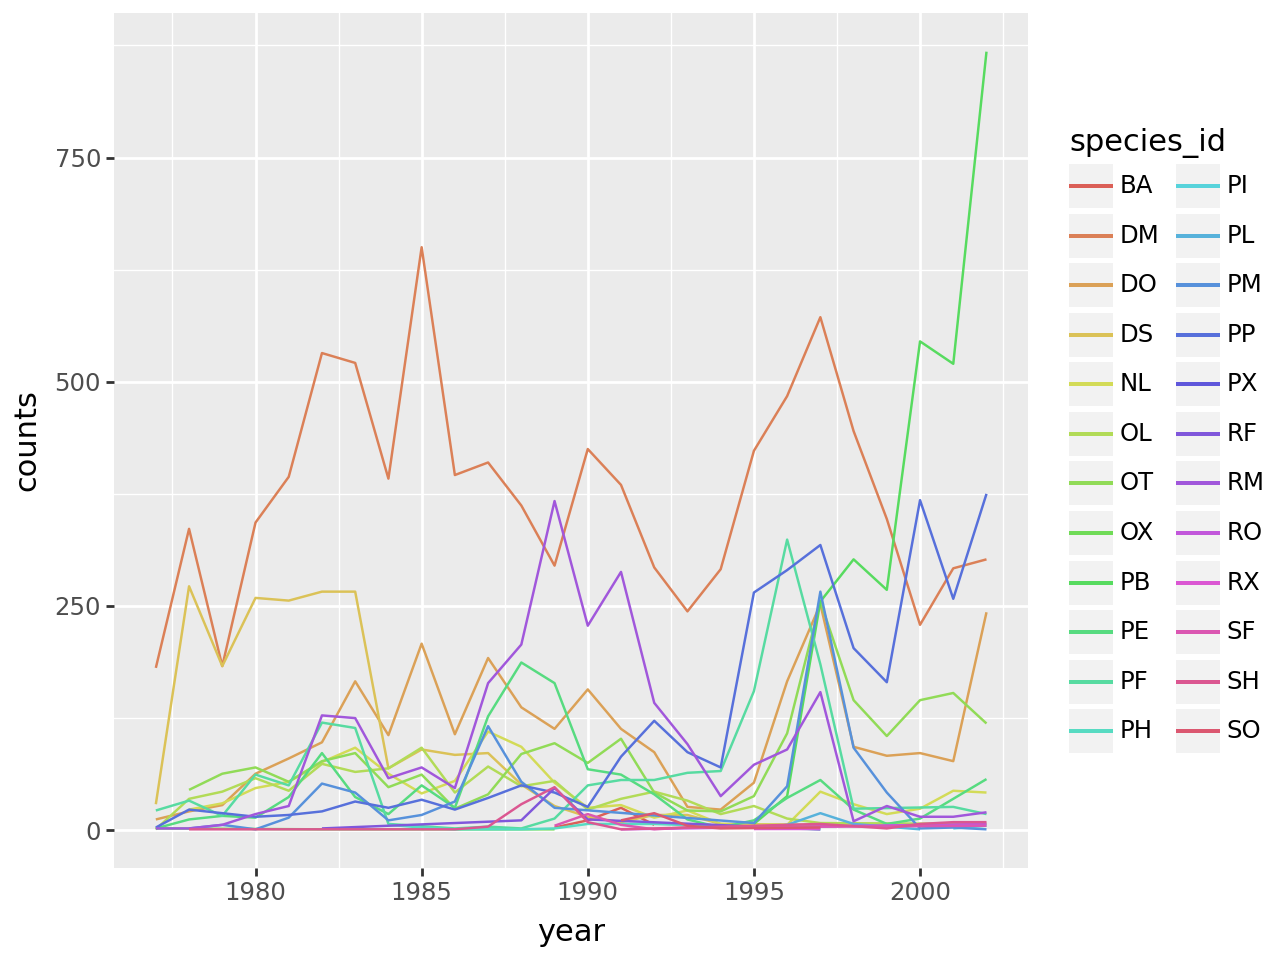

In [57]:
(p9.ggplot(data=yearly_counts, mapping=p9.aes(x="year", y="counts", colour="species_id"))
   + p9.geom_line()
)

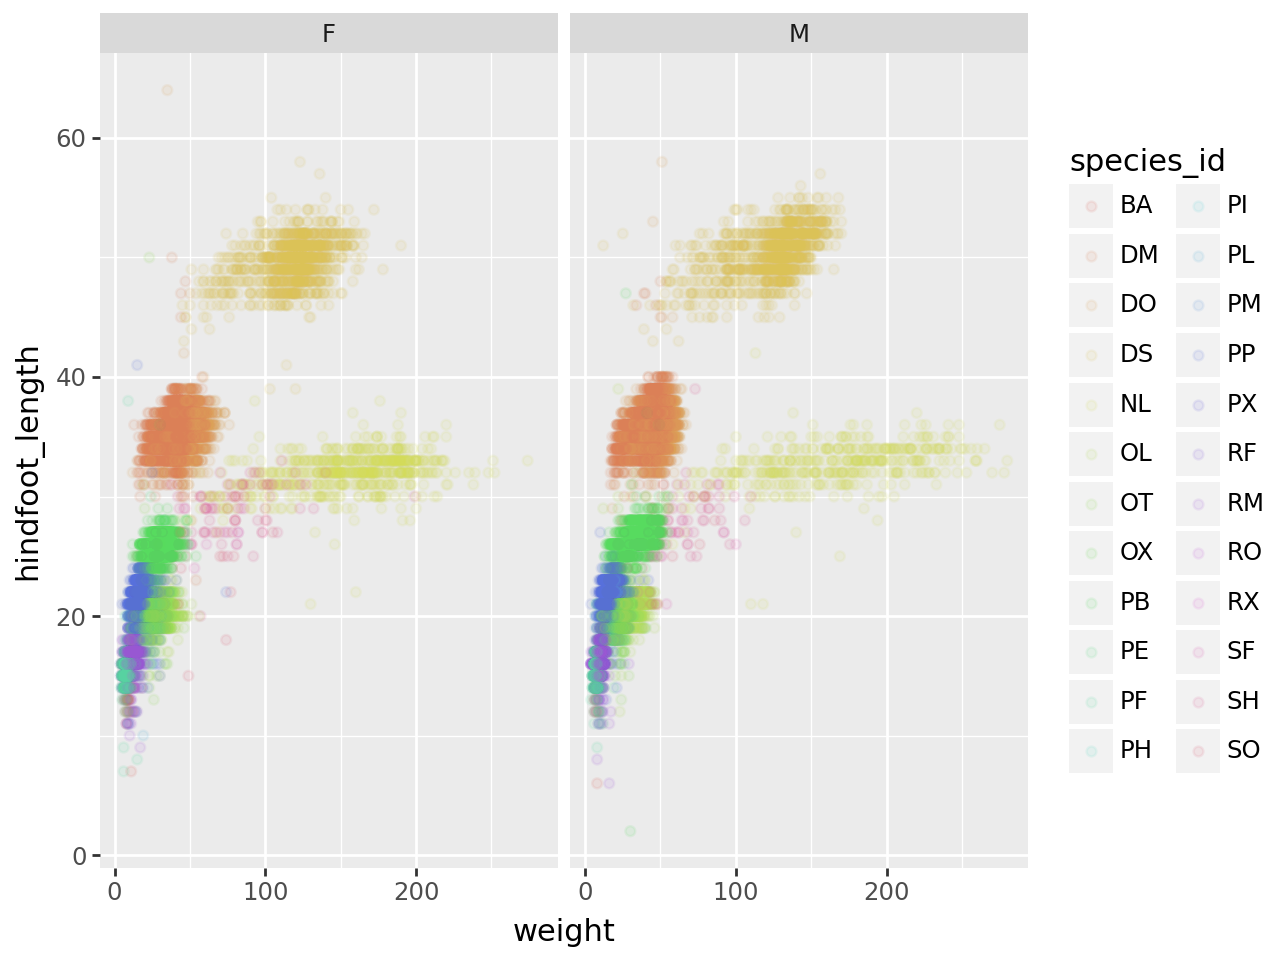

In [58]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='weight',
                         y='hindfoot_length',
                         color='species_id'))
   + p9.geom_point(alpha=0.1)
   + p9.facet_wrap("sex")
)